# Data collection <br>
This study will use a systematic approach to retrieve data from the internet. Since there is a lot of data about crime this study decided to narrow in the scope of what would be considered a good resource. Hench forth most of the data will be sourced from the Swedish Police’s open API, which is maintained by the Swedish National Council for Crime Prevention (Brå, 2025). Quarterly crime statistics for 2020 were downloaded from BRÅ’s official database. We focused on the following crime categories: Theft and robbery, Drug offenses, Traffic offenses, Crimes against life and health. 
The year 2020 was selected due to data availability and consistency across municipalities, allowing for a controlled comparison within a single calendar year. The data used in this study is limited to two municipalities: Borlänge and Stockholm, allowing for comparative analysis between a smaller and a larger urban area.
Prior to analysis, the dataset was filtered to include only the selected crime categories and complete quarterly data entries. The study also acknowledges that there are certain null values in the initial data that was acquired but after some processing that was solved with Jupyter. 


# Data processing <br>
After downloading the data from BRÅ’s website, we discovered that the provided Excel files were outdated and incompatible with Jupyter Notebook. Therefore, we manually extracted the raw text-based crime statistics and created a clean, structured Excel file. Missing values (represented as "..") were excluded from all statistical analysis. 
To facilitate the data reconstruction process, we used ChatGPT to help generate a functional Excel table based on a screenshot of the original dataset. This approach allowed us to recreate an accurate version of the data suitable for analysis. 
In Python, we transformed the finalized Excel data into long format using pandas.melt() which allowed for easier visualization and statistical operations. To prepare for plotting and analysis, we filtered the data by municipality and created two separate DataFrames, one for Borlänge and one for Stockholm which we used in visualizations. 
For the statistical analysis, we manually selected relevant crime types and entered their values into NumPy arrays in Jupyter Notebook to conduct Chi-square Goodness-of-Fit tests. This allowed us to test whether crimes were evenly distributed across quarters. 
Later, to perform Chi-square Tests of Independence, we used pandas.pivot_table() to convert the long format data into contingency tables (2D arrays) which were required for the chi2_contingency() function in scipy.stats.
All of our statistical operations were inspired by previous labs.
The data were split into four quarters: Q1: Jan-Mar, Q2: Apr-Jun, Q3: Jul-Sep, Q4: Oct-Dec


In [1]:
!pip install pandas openpyxl matplotlib seaborn scipy


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import numpy as np

In [9]:
df = pd.read_excel("anmalda_brott_2020.xlsx")  
df.head()

,Kommun,Brottstyp,Kvartal 1,Kvartal 2,Kvartal 3,Kvartal 4
0,Borlänge,3 kap. Brott mot liv och hälsa,113.0,158.0,151.0,113.0
1,Borlänge,"8 kap. Stöld, rån m.m.",459.0,431.0,544.0,381.0
2,Borlänge,Brott mot trafikbrottslagen,116.0,112.0,105.0,97.0
3,Borlänge,Brott mot narkotikastrafflagen,145.0,112.0,120.0,163.0
4,Borlänge,NaN,NaN,NaN,NaN,NaN


In [11]:
df_melted = df.melt(id_vars=["Brottstyp", "Kommun"],
                    value_vars=["Kvartal 1", "Kvartal 2", "Kvartal 3", "Kvartal 4"],
                    var_name="Kvartal",
                    value_name="Antal")
df_melted = df_melted.dropna()
df_melted


,Brottstyp,Kommun,Kvartal,Antal
0,3 kap. Brott mot liv och hälsa,Borlänge,Kvartal 1,113.0
1,"8 kap. Stöld, rån m.m.",Borlänge,Kvartal 1,459.0
2,Brott mot trafikbrottslagen,Borlänge,Kvartal 1,116.0
3,Brott mot narkotikastrafflagen,Borlänge,Kvartal 1,145.0
5,3 kap. Brott mot liv och hälsa,Stockholm,Kvartal 1,2388.0
6,"8 kap. Stöld, rån m.m.",Stockholm,Kvartal 1,14209.0
7,Brott mot trafikbrottslagen,Stockholm,Kvartal 1,1479.0
8,Brott mot narkotikastrafflagen,Stockholm,Kvartal 1,3724.0
10,3 kap. Brott mot liv och hälsa,Borlänge,Kvartal 2,158.0
11,"8 kap. Stöld, rån m.m.",Borlänge,Kvartal 2,431.0


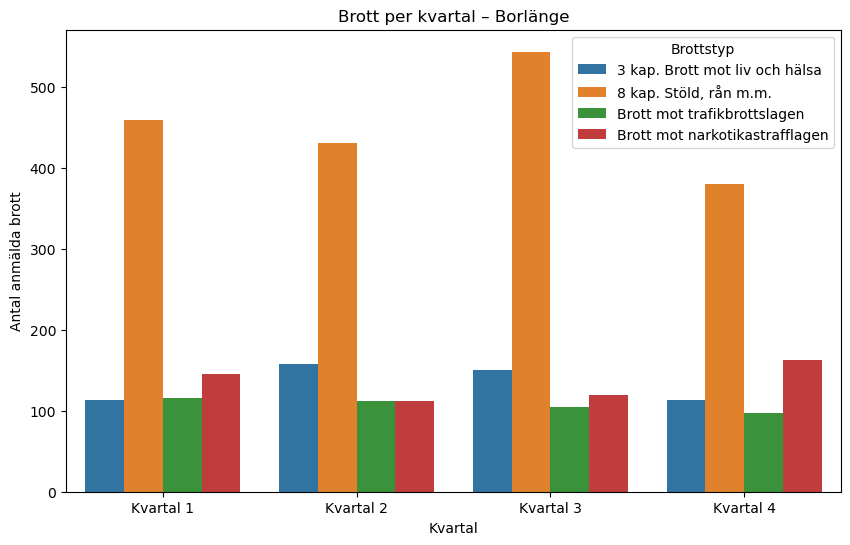

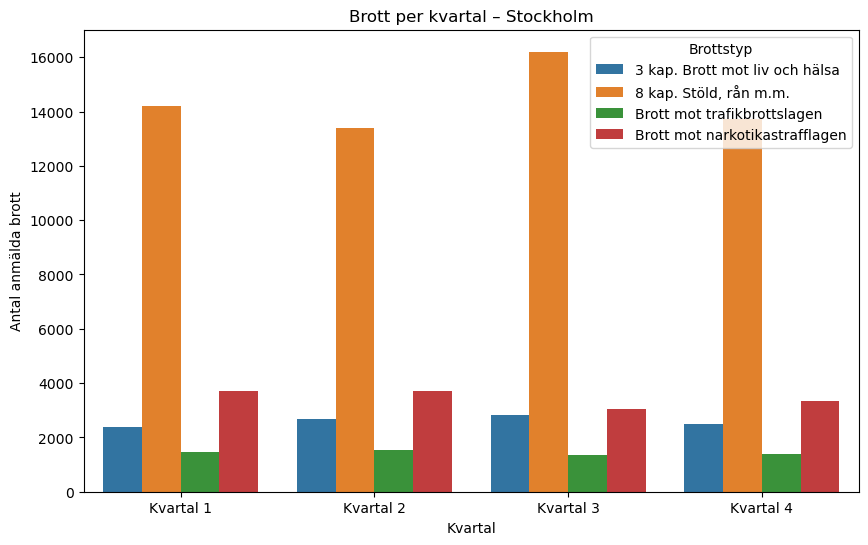

In [13]:
# Filtrera data för varje kommun
df_borlange = df_melted[df_melted["Kommun"] == "Borlänge"]
df_stockholm = df_melted[df_melted["Kommun"] == "Stockholm"]

# Skapa två separata figurer
plt.figure(figsize=(10, 6))
sns.barplot(data=df_borlange, x="Kvartal", y="Antal", hue="Brottstyp")
plt.title("Brott per kvartal – Borlänge")
plt.ylabel("Antal anmälda brott")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_stockholm, x="Kvartal", y="Antal", hue="Brottstyp")
plt.title("Brott per kvartal – Stockholm")
plt.ylabel("Antal anmälda brott")
plt.show()


In [6]:
df_melted["Brottstyp"].unique()

array(['3 kap. Brott mot liv och hälsa', '8 kap. Stöld, rån m.m.',
       'Brott mot trafikbrottslagen', 'Brott mot narkotikastrafflagen'],
      dtype=object)

In [30]:
#H0: Brotten är jämnt fördelade över alla kvartal = ingen säsongseffekt
#H1: Brotten är INTE jämnt fördelade över alla kvartal = det finns en säsongseffekt

#Chitvå test GOODNESS OF FIT ENBART FÖR STÖLD I BORLÄNGE

# Observerade värden – brott per kvartal
observed = np.array([459, 431, 544, 381])  # Ex: Stöld, rån m.m. i Borlänge

# Förväntade värden – jämnt fördelat
expected = [sum(observed) / len(observed)] * len(observed)

# Chi2-test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Resultat
print("Chi2 Goodness-of-Fit")
print(f"Observerade: {observed}")
print(f"Förväntade: {expected}")
print(f"Chi2-statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Om P värdet är större än 0.05 så kan vi inte förkasta Noll hyptesen = Att brotten är jämt fördelade över alla kvartal = Inget mönster
if p_value < 0.05:
    print("Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen. ")
else:
    print("Resultatet är inte signifikant – ingen tydlig säsongseffekt.")


Chi2 Goodness-of-Fit
Observerade: [459 431 544 381]
Förväntade: [np.float64(453.75), np.float64(453.75), np.float64(453.75), np.float64(453.75)]
Chi2-statistic: 30.82
P-value: 0.0000
 Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen. 


We reject the null hypothesis. <br>
This indicates that theft and robbery crimes in Borlänge are not evenly distributed across the year and there is a statistically significant seasonal pattern with the highest number of crimes occurring in Q3 (summer months).

In [33]:

#H0: Brotten är jämnt fördelade över alla kvartal = ingen säsongseffekt
#H1: Brotten är INTE jämnt fördelade över alla kvartal = det finns en säsongseffekt

#Chitvå test GOODNESS OF FIT ENBART FÖR STÖLD I Stockholm

# Observerade värden – brott per kvartal
observed = np.array([14209, 13409,16203, 13731])  # Stöld, rån m.m. i Stockholm

# Förväntade värden – jämnt fördelat
expected = [sum(observed) / len(observed)] * len(observed)

# Chi2-test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Resultat
print("Chi2 Goodness-of-Fit")
print(f"Observerade: {observed}")
print(f"Förväntade: {expected}")
print(f"Chi2-statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.10f}")

# # Om P värdet är större än 0.05 så kan vi inte förkasta Noll hyptesen = Att brotten är jämt fördelade över alla kvartal = Inget mönster

if p_value < 0.05:
    print("Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.")
else:
    print("Resultatet är inte signifikant – ingen tydlig säsongseffekt.")


▶️ Chi2 Goodness-of-Fit
Observerade: [14209 13409 16203 13731]
Förväntade: [np.float64(14388.0), np.float64(14388.0), np.float64(14388.0), np.float64(14388.0)]
Chi2-statistic: 327.80
P-value: 0.0000000000
✅ Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.


We reject the null hypothesis. <br>
This indicates that theft and robbery crimes in Stockholm are not evenly distributed across the year and there is a statistically significant seasonal pattern with the highest number of crimes occurring in Q3 (summer months).

In [10]:
#H0: Brotten är jämnt fördelade över alla kvartal = ingen säsongseffekt
#H1: Brotten är INTE jämnt fördelade över alla kvartal = det finns en säsongseffekt

#Chitvå test GOODNESS OF FIT Brott mot liv och hälsa Borlänge

# Observerade värden – brott per kvartal
observed = np.array([113, 158,151, 113])  

# Förväntade värden – jämnt fördelat
expected = [sum(observed) / len(observed)] * len(observed)

# Chi2-test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Resultat
print("Chi2 Goodness-of-Fit")
print(f"Observerade: {observed}")
print(f"Förväntade: {expected}")
print(f"Chi2-statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# # Om P värdet är större än 0.05 så kan vi inte förkasta Noll hyptesen = Att brotten är jämt fördelade över alla kvartal = Inget mönster

if p_value < 0.05:
    print("Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.")
else:
    print("Resultatet är inte signifikant – ingen tydlig säsongseffekt.")


▶️ Chi2 Goodness-of-Fit
Observerade: [113 158 151 113]
Förväntade: [np.float64(133.75), np.float64(133.75), np.float64(133.75), np.float64(133.75)]
Chi2-statistic: 13.06
P-value: 0.0045
✅ Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.


We reject the null hypothesis. <br>
This indicates that crimes against human life and health in Borlänge are not evenly distributed across the year and there is a statistically significant seasonal pattern with the highest number of crimes occurring in Q2.

In [37]:
#H0: Brotten är jämnt fördelade över alla kvartal = ingen säsongseffekt
#H1: Brotten är INTE jämnt fördelade över alla kvartal = det finns en säsongseffekt

#Chitvå test GOODNESS OF FIT Brott mot liv och hälsa i Stockholm

#Observerade värden – brott per kvartal,
observed = np.array([2388,2683,2810, 2507])

#Förväntade värden – jämnt fördelat,
expected = [sum(observed) / len(observed)] * len(observed)

#Chi2-test,
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

#Resultat,
print("Chi2 Goodness-of-Fit")
print(f"Observerade: {observed}")
print(f"Förväntade: {expected}")
print(f"Chi2-statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.10f}")

#Tolkning,
if p_value < 0.05:
    print("Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.")
else:
    print("Resultatet är inte signifikant – ingen tydlig säsongseffekt.")

▶️ Chi2 Goodness-of-Fit
Observerade: [2388 2683 2810 2507]
Förväntade: [np.float64(2597.0), np.float64(2597.0), np.float64(2597.0), np.float64(2597.0)]
Chi2-statistic: 40.26
P-value: 0.0000000094
✅ Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.


We reject the null hypothesis. <br>
This indicates that crimes against human life and health in Stockholm are not evenly distributed across the year and there is a statistically significant seasonal pattern with the highest number of crimes occurring in Q3.

In [11]:
#H0: Brotten är jämnt fördelade över alla kvartal = ingen säsongseffekt
#H1: Brotten är INTE jämnt fördelade över alla kvartal = det finns en säsongseffekt

#Chitvå test GOODNESS OF FIT Brott mot trafikbrottslagen i Borlänge

# Observerade värden – brott per kvartal
observed = np.array([116, 112,105, 97])  

# Förväntade värden – jämnt fördelat
expected = [sum(observed) / len(observed)] * len(observed)

# Chi2-test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Resultat
print("Chi2 Goodness-of-Fit")
print(f"Observerade: {observed}")
print(f"Förväntade: {expected}")
print(f"Chi2-statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# # Om P värdet är större än 0.05 så kan vi inte förkasta Noll hyptesen = Att brotten är jämt fördelade över alla kvartal = Inget mönster

if p_value < 0.05:
    print("Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.")
else:
    print("Resultatet är inte signifikant – ingen tydlig säsongseffekt.")


▶️ Chi2 Goodness-of-Fit
Observerade: [116 112 105  97]
Förväntade: [np.float64(107.5), np.float64(107.5), np.float64(107.5), np.float64(107.5)]
Chi2-statistic: 1.94
P-value: 0.5841
❌ Resultatet är inte signifikant – ingen tydlig säsongseffekt.


We cannot reject the null hypothesis. <br>
This indicates that crimes against traffic laws in Borlänge are evenly distributed across the year and that we can not prove that this is a seasonal pattern

In [12]:
#H0: Brotten är jämnt fördelade över alla kvartal = ingen säsongseffekt
#H1: Brotten är INTE jämnt fördelade över alla kvartal = det finns en säsongseffekt

#Chitvå test GOODNESS OF FIT Brott mot trafikbrottslagen i Stockholm

# Observerade värden – brott per kvartal
observed = np.array([1479, 1532,1369, 1396])  

# Förväntade värden – jämnt fördelat
expected = [sum(observed) / len(observed)] * len(observed)

# Chi2-test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Resultat
print("Chi2 Goodness-of-Fit")
print(f"Observerade: {observed}")
print(f"Förväntade: {expected}")
print(f"Chi2-statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# # Om P värdet är större än 0.05 så kan vi inte förkasta Noll hyptesen = Att brotten är jämt fördelade över alla kvartal = Inget mönster

if p_value < 0.05:
    print("Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.")
else:
    print("Resultatet är inte signifikant – ingen tydlig säsongseffekt.")


▶️ Chi2 Goodness-of-Fit
Observerade: [1479 1532 1369 1396]
Förväntade: [np.float64(1444.0), np.float64(1444.0), np.float64(1444.0), np.float64(1444.0)]
Chi2-statistic: 11.70
P-value: 0.0085
✅ Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.


We reject the null hypothesis. <br>
This indicates that crimes against traffic laws in Stockholm are not evenly distributed across the year and there is a statistically significant seasonal pattern with the highest number of crimes occurring in Q2.

In [13]:
#H0: Brotten är jämnt fördelade över alla kvartal = ingen säsongseffekt
#H1: Brotten är INTE jämnt fördelade över alla kvartal = det finns en säsongseffekt

#Chitvå test GOODNESS OF FIT Brott mot Narkotikastrafflagen i Borlänge

# Observerade värden – brott per kvartal
observed = np.array([145, 112,120, 163])  

# Förväntade värden – jämnt fördelat
expected = [sum(observed) / len(observed)] * len(observed)

# Chi2-test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Resultat
print("Chi2 Goodness-of-Fit")
print(f"Observerade: {observed}")
print(f"Förväntade: {expected}")
print(f"Chi2-statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# # Om P värdet är större än 0.05 så kan vi inte förkasta Noll hyptesen = Att brotten är jämt fördelade över alla kvartal = Inget mönster

if p_value < 0.05:
    print("Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.")
else:
    print("Resultatet är inte signifikant – ingen tydlig säsongseffekt.")


▶️ Chi2 Goodness-of-Fit
Observerade: [145 112 120 163]
Förväntade: [np.float64(135.0), np.float64(135.0), np.float64(135.0), np.float64(135.0)]
Chi2-statistic: 12.13
P-value: 0.0069
✅ Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.


We reject the null hypothesis. <br>
This indicates that crimes against narcotics in Borlänge are not evenly distributed across the year and there is a statistically significant seasonal pattern with the highest number of crimes occurring in Q4.

In [14]:
#H0: Brotten är jämnt fördelade över alla kvartal = ingen säsongseffekt
#H1: Brotten är INTE jämnt fördelade över alla kvartal = det finns en säsongseffekt

#Chitvå test GOODNESS OF FIT Brott mot Narkotikastrafflagen i Stockholm

# Observerade värden – brott per kvartal
observed = np.array([3724, 3701,3060, 3353])  

# Förväntade värden – jämnt fördelat
expected = [sum(observed) / len(observed)] * len(observed)

# Chi2-test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Resultat
print("Chi2 Goodness-of-Fit")
print(f"Observerade: {observed}")
print(f"Förväntade: {expected}")
print(f"Chi2-statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Om P värdet är större än 0.05 så kan vi inte förkasta Noll hyptesen = Att brotten är jämt fördelade över alla kvartal = Inget mönster
if p_value < 0.05:
    print("Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.")
else:
    print("Resultatet är inte signifikant – ingen tydlig säsongseffekt.")


▶️ Chi2 Goodness-of-Fit
Observerade: [3724 3701 3060 3353]
Förväntade: [np.float64(3459.5), np.float64(3459.5), np.float64(3459.5), np.float64(3459.5)]
Chi2-statistic: 86.49
P-value: 0.0000
✅ Resultatet är signifikant – brotten är inte jämnt fördelade över kvartalen.


We reject the null hypothesis. <br>
This indicates that crimes against narcotics in Stockholm are not evenly distributed across the year and there is a statistically significant seasonal pattern with the highest number of crimes occurring in Q2.

Now we are conducting Chisquare Test of Independence with the variables: 'Brottstyp', 'Kvartal', 'Antal' och 'sum' both in Stockholm and Borlänge and are going to test if there is a seasonal pattern across all categories and not just one. <br> The aim of this test is to determine whether there is a seasonal pattern across all crime categories, rather than just in one specific category. <br>

Our hypothesis is: <br>
Does crime type and quarter vary together?
<br>
If the result is statistically significant, it would suggest that certain crime types are more likely to occur in specific quarters, indicating seasonal effects that differ by crime category.

In [48]:

# BORLÄNGE 
print("Borlänge")

# Filtrera till rätt kommun
df_borlange = df_melted[df_melted["Kommun"] == "Borlänge"]

# Skapa kontingenstabell
borlange_table = pd.pivot_table(
    df_borlange,
    index="Brottstyp",
    columns="Kvartal",
    values="Antal",
    aggfunc="sum"
).fillna(0)

borlange_data = borlange_table.values  # 2D-array

# Kör chi2
chi2_b, p_b, dof_b, expected_b = chi2_contingency(borlange_data)

print(f"Chi2-statistic: {chi2_b:.2f}")
print(f"P-value: {p_b:.4f}")
print("Förväntade värden:")
print(expected_b)
if p_b < 0.05:
    print("Brottsfördelningen över kvartal skiljer sig mellan brottstyper (signifikant).")
else:
    print("Ingen signifikant skillnad i fördelningen mellan kvartal.")

print("===============================")

# STOCKHOLM
print("Stockholm")

# Filtrera till rätt kommun
df_stockholm = df_melted[df_melted["Kommun"] == "Stockholm"]

# Skapa kontingenstabell
stockholm_table = pd.pivot_table(
    df_stockholm,
    index="Brottstyp",
    columns="Kvartal",
    values="Antal",
    aggfunc="sum"
).fillna(0)

stockholm_data = stockholm_table.values  # 2D-array

# Kör chi2
chi2_s, p_s, dof_s, expected_s = chi2_contingency(stockholm_data)

print(f"Chi2-statistic: {chi2_s:.2f}")
print(f"P-value: {p_s:.4f}")
print("Förväntade värden:")
print(expected_s)
if p_s < 0.05:
    print("Brottsfördelningen över kvartal skiljer sig mellan brottstyper (signifikant).")
else:
    print("Ingen signifikant skillnad i fördelningen mellan kvartal.")


▶️ Borlänge
Chi2-statistic: 41.35
P-value: 0.0000
Förväntade värden:
[[134.23343373 131.01054217 148.25301205 121.50301205]
 [455.39006024 444.4563253  502.95180723 412.20180723]
 [135.48795181 132.23493976 149.63855422 122.63855422]
 [107.88855422 105.29819277 119.15662651  97.65662651]]
✅ Brottsfördelningen över kvartal skiljer sig mellan brottstyper (signifikant).


▶️ Stockholm
Chi2-statistic: 293.90
P-value: 0.0000
Förväntade värden:
[[ 2586.49976015  2530.1425406   2781.31776961  2490.03992964]
 [14329.82616442 14017.59371359 15409.16444708 13795.4156749 ]
 [ 3445.51248372  3370.43824383  3705.03227722  3317.01699523]
 [ 1438.1615917   1406.82550198  1546.48550609  1384.52740023]]
✅ Brottsfördelningen över kvartal skiljer sig mellan brottstyper (signifikant).


The Chi-square Test of Independence yielded a p-value < 0.001 for both municipalities. This indicates that the distribution of crime types is significantly associated with the time of year. In other words, certain crime types are more likely to occur in specific quarters showing a strong seasonal dependency.